In [1]:
# using plaidml to connect to my eGPU
import os

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
# read csv file into a pandas dataframe
import numpy as np
import pandas as pd

train = pd.read_csv('AID688red_train.csv')
test = pd.read_csv('AID688red_test.csv')

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


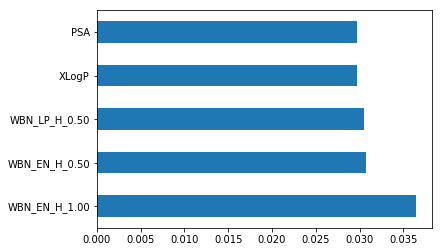

In [3]:
# Function for converting categorical label into a numerical one
def outcome_to_numeric(x):
    if x=='Inactive':
        return 0
    if x=='Active':
        return 1
    
# Apply function to label column
train['label'] = train['Outcome'].apply(outcome_to_numeric)
test['label'] = test['Outcome'].apply(outcome_to_numeric)

# Drop categorical column
train=train.drop('Outcome', axis=1)
test=test.drop('Outcome', axis=1)

# Split datasets into feature and label dataframes
x_train = train.drop('label', axis=1)
y_train = train['label']

x_test = test.drop('label', axis=1)
y_test = test['label']

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

# Select best features for the label
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [4]:
# Create dataframe with olny the best features
x_train = x_train[['PSA', 'XLogP', 'WBN_LP_H_0.50', 'WBN_EN_H_0.50', 'WBN_EN_H_1.00']]

x_test = x_test[['PSA', 'XLogP', 'WBN_LP_H_0.50', 'WBN_EN_H_0.50', 'WBN_EN_H_1.00']]

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
from keras import layers


model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = optimizers.nadam(lr=.001)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Using plaidml.keras.backend backend.
INFO:plaidml:Opening device "metal_amd_radeon_rx_580.0"


In [6]:
model.fit(x_train, y_train,
          epochs=10,
          batch_size=128)

Epoch 1/10
21751/21751 [==============================] - 2s 94us/step - loss: 0.3445 - acc: 0.9528
Epoch 2/10
21751/21751 [==============================] - 1s 43us/step - loss: 0.0840 - acc: 0.9895
Epoch 3/10
21751/21751 [==============================] - 1s 43us/step - loss: 0.0709 - acc: 0.9898
Epoch 4/10
21751/21751 [==============================] - 1s 42us/step - loss: 0.0660 - acc: 0.9903
Epoch 5/10
21751/21751 [==============================] - 1s 40us/step - loss: 0.0632 - acc: 0.9908
Epoch 6/10
21751/21751 [==============================] - 1s 45us/step - loss: 0.0599 - acc: 0.9907
Epoch 7/10
21751/21751 [==============================] - 1s 46us/step - loss: 0.0601 - acc: 0.9909
Epoch 8/10
21751/21751 [==============================] - 1s 43us/step - loss: 0.0598 - acc: 0.9909
Epoch 9/10
21751/21751 [==============================] - 1s 41us/step - loss: 0.0585 - acc: 0.9909
Epoch 10/10
21751/21751 [==============================] - 1s 40us/step - loss: 0.0575 - acc: 0.9909

In [7]:
score = model.evaluate(x_test, y_test, batch_size=128)
print('Score', score)

5438/5438 [==============================] - 0s 72us/step
Score [0.057381231410400795, 0.9908054431118742]
